# Theoretical Questions

Ans 1:
Unsupervised learning involves training a model on data without labeled responses. The goal is to find patterns, structures, or groupings in the data — clustering is a common example.



Ans2:
K-Means partitions data into K clusters by:

Randomly initializing K centroids.

Assigning each point to the nearest centroid.

Recomputing centroids as the mean of assigned points.

Repeating steps 2 and 3 until convergence.



Ans3:
A dendrogram is a tree-like diagram that shows the hierarchical relationships between data points. It visualizes the merging (or splitting) of clusters at different distances.



Ans4: The main difference between K-Means and Hierarchical Clustering:
K-Means is a partitioning method (needs the number of clusters in advance).

Hierarchical clustering builds a tree structure of clusters without needing to specify K.


Ans5:The advantages of DBSCAN over K-Means:
Can find arbitrarily shaped clusters.

Automatically detects noise/outliers.

No need to predefine the number of clusters.

Works well on data with varying densities.



6:
Use it to evaluate clustering quality:

Ranges from -1 to 1.

Higher values mean better-defined clusters.

Helps determine the optimal number of clusters.


7.
Not scalable for large datasets (high time and space complexity).

Sensitive to noise and outliers.

Merging/splitting is irreversible (greedy method).


8.
K-Means relies on Euclidean distance. If features are on different scales, it biases clustering. Feature scaling ensures all features contribute equally.

9.
DBSCAN marks a point as noise if it:

Has fewer than min_samples neighbors within a radius eps.

Is not reachable from any dense region.


10.
Inertia is the sum of squared distances between each point and its assigned centroid. Lower inertia means tighter clusters.


11.
It plots inertia vs. number of clusters (K). The "elbow" point where inertia drops sharply and then levels off is the optimal K.


12.
Density is defined by:

eps: neighborhood radius.

min_samples: minimum points within eps to form a dense region (core point).


13.
Yes, but you must use appropriate distance metrics (e.g., Hamming distance) and sometimes encoding methods (like one-hot encoding).


14.
A negative score means a data point is closer to a neighboring cluster than to its own cluster — indicating poor clustering.


15.
Linkage criteria determine how distances between clusters are calculated:

Single: closest points

Complete: farthest points

Average: mean distance

Ward: minimizes variance



16.
K-Means assumes:

Spherical clusters

Similar sizes/densities
It struggles with irregular shapes or varying densities.



17.
eps: neighborhood radius — affects the size of dense regions.

min_samples: minimum points to form a core point — influences how strict density requirements are.



18.
K-Means++ smartly selects initial centroids by spreading them out, reducing chances of poor local minima and improving convergence.



19.
A bottom-up hierarchical clustering method:

Starts with each point as its own cluster.

Iteratively merges the closest pair of clusters until one cluster or desired K remains.


20.
Inertia only decreases with more clusters (always favors higher K).

Silhouette Score balances cohesion and separation, offering meaningful evaluation of clustering quality.



# Practical Questions

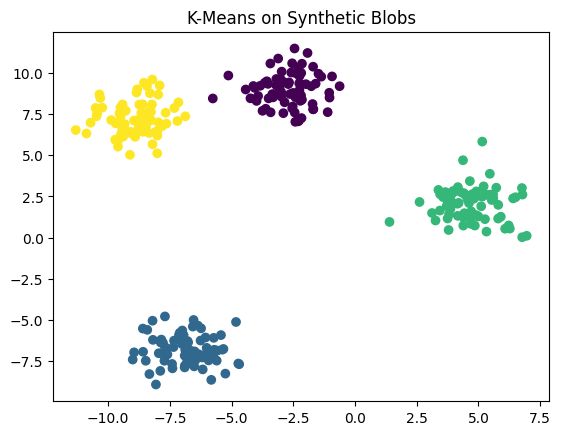

In [1]:
#Ans21
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300, centers=4, random_state=42)
kmeans = KMeans(n_clusters=4, random_state=42).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("K-Means on Synthetic Blobs")
plt.show()


In [2]:
#Ans22
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
X = iris.data
agg = AgglomerativeClustering(n_clusters=3).fit(X)
print("First 10 predicted labels:", agg.labels_[:10])


First 10 predicted labels: [1 1 1 1 1 1 1 1 1 1]


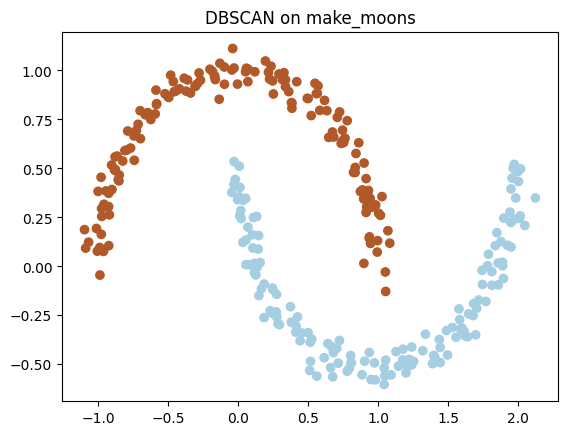

In [3]:
#Ans23
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import numpy as np

X, _ = make_moons(n_samples=300, noise=0.05, random_state=0)
db = DBSCAN(eps=0.2, min_samples=5).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=db.labels_, cmap='Paired')
plt.title("DBSCAN on make_moons")
plt.show()


In [4]:
#Ans24
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

wine = load_wine()
X = StandardScaler().fit_transform(wine.data)

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print("Cluster sizes:", dict(zip(unique, counts)))


Cluster sizes: {np.int32(0): np.int64(65), np.int32(1): np.int64(51), np.int32(2): np.int64(62)}


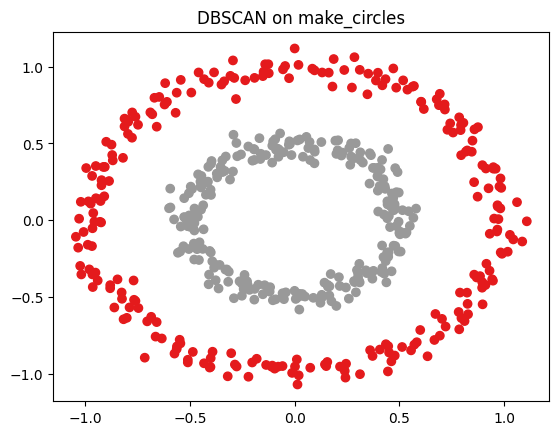

In [5]:
#Ans25
from sklearn.datasets import make_circles

X, _ = make_circles(n_samples=500, factor=0.5, noise=0.05)
db = DBSCAN(eps=0.2, min_samples=5).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=db.labels_, cmap='Set1')
plt.title("DBSCAN on make_circles")
plt.show()


In [6]:
#Ans26
X = StandardScaler().fit_transform(wine.data)
db = DBSCAN(eps=1.5, min_samples=5).fit(X)

n_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
print("Number of clusters (excluding noise):", n_clusters)


Number of clusters (excluding noise): 0


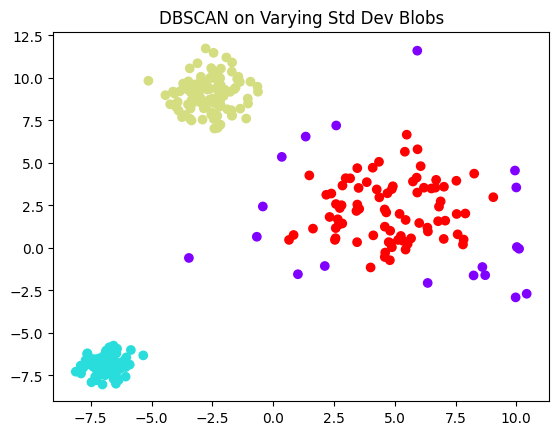

In [7]:
#Ans27
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)
db = DBSCAN(eps=1.5, min_samples=5).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=db.labels_, cmap='rainbow')
plt.title("DBSCAN on Varying Std Dev Blobs")
plt.show()


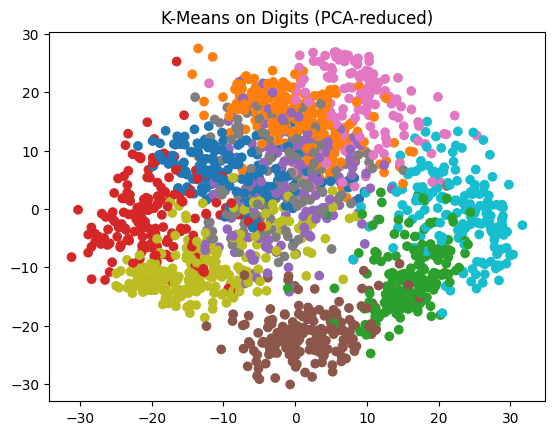

In [8]:
#Ans28
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits = load_digits()
X_pca = PCA(n_components=20).fit_transform(digits.data)

kmeans = KMeans(n_clusters=10, random_state=0).fit(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='tab10')
plt.title("K-Means on Digits (PCA-reduced)")
plt.show()


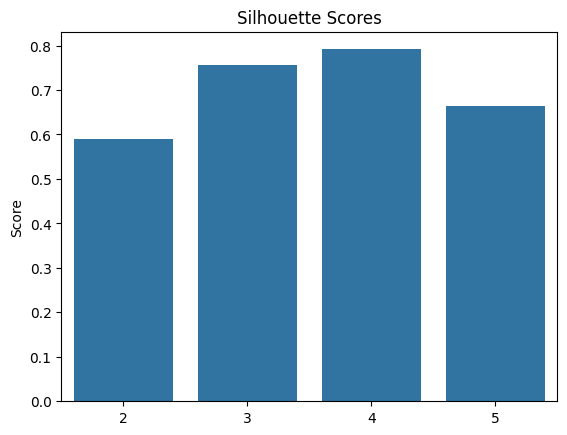

In [9]:
#Ans29
from sklearn.metrics import silhouette_score
import seaborn as sns

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
scores = []

for k in range(2, 6):
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    scores.append(silhouette_score(X, km.labels_))

sns.barplot(x=[2, 3, 4, 5], y=scores)
plt.title("Silhouette Scores")
plt.ylabel("Score")
plt.show()


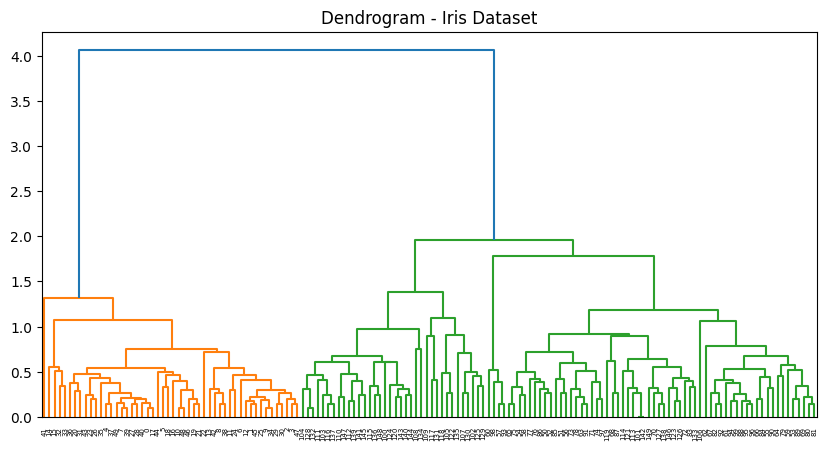

In [10]:
#Ans30
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(iris.data, method='average')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Dendrogram - Iris Dataset")
plt.show()


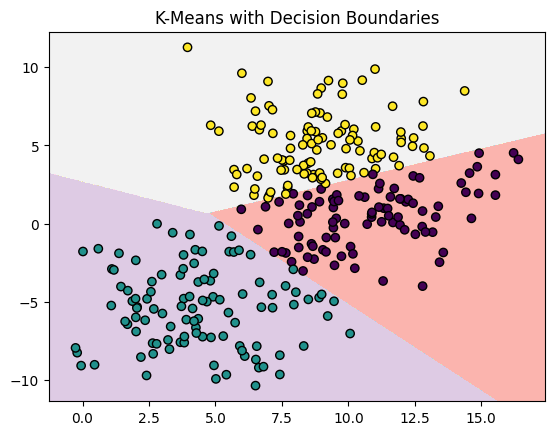

In [11]:
#Ans31
import numpy as np
from matplotlib.colors import ListedColormap

X, _ = make_blobs(n_samples=300, centers=3, cluster_std=2.5, random_state=4)
kmeans = KMeans(n_clusters=3).fit(X)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='Pastel1')
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, edgecolor='k')
plt.title("K-Means with Decision Boundaries")
plt.show()


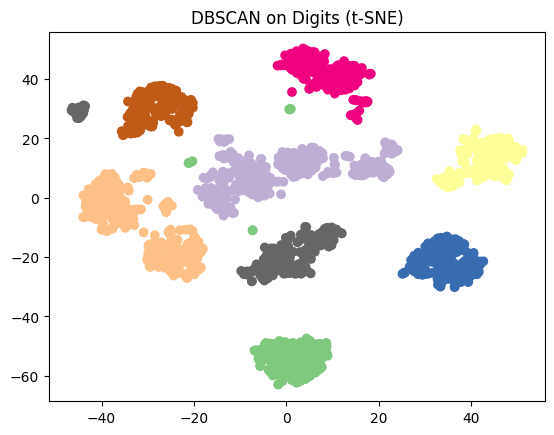

In [12]:
#Ans32
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2, random_state=42).fit_transform(digits.data)
db = DBSCAN(eps=5, min_samples=5).fit(X_tsne)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=db.labels_, cmap='Accent')
plt.title("DBSCAN on Digits (t-SNE)")
plt.show()


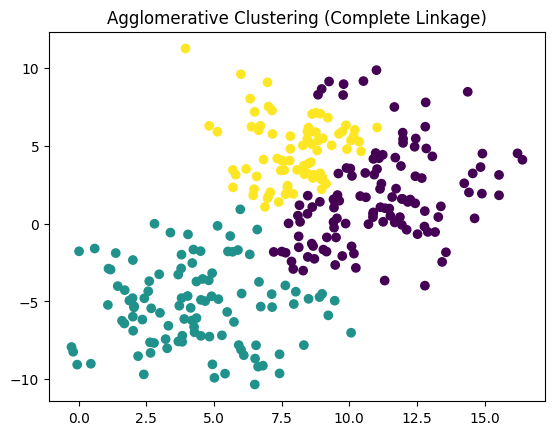

In [13]:
#Ans33
agg = AgglomerativeClustering(n_clusters=3, linkage='complete').fit(X)
plt.scatter(X[:, 0], X[:, 1], c=agg.labels_)
plt.title("Agglomerative Clustering (Complete Linkage)")
plt.show()


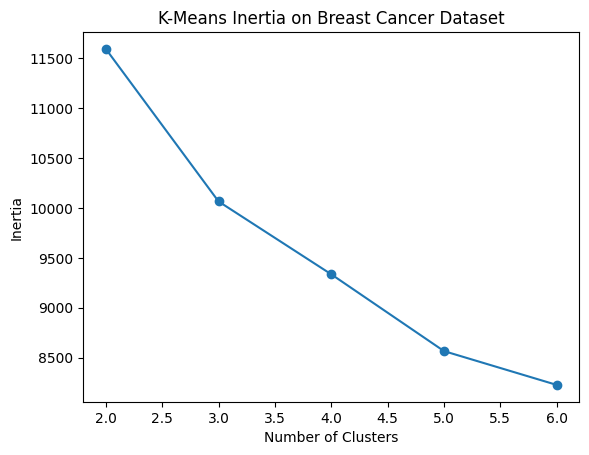

In [14]:
#Ans34
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_scaled = StandardScaler().fit_transform(cancer.data)

inertias = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=0).fit(X_scaled)
    inertias.append(km.inertia_)

plt.plot(range(2, 7), inertias, marker='o')
plt.title("K-Means Inertia on Breast Cancer Dataset")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


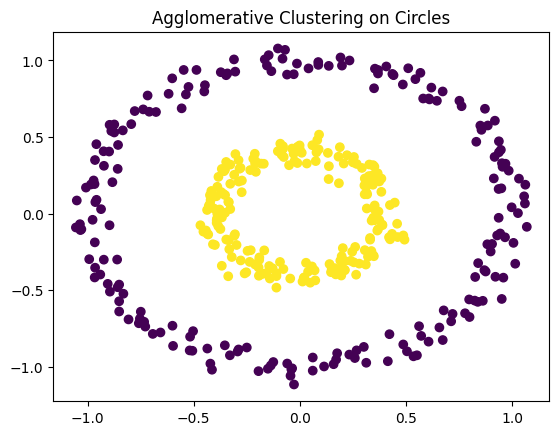

In [15]:
#Ans35
X, _ = make_circles(n_samples=400, factor=0.4, noise=0.05)
agg = AgglomerativeClustering(n_clusters=2, linkage='single').fit(X)

plt.scatter(X[:, 0], X[:, 1], c=agg.labels_)
plt.title("Agglomerative Clustering on Circles")
plt.show()


In [16]:
#Ans36
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_scaled)
print("Cluster centers:\n", kmeans.cluster_centers_)


Cluster centers:
 [[ 0.98649786  0.49202131  1.01866689  0.97479724  0.5871176   1.014073
   1.14492245  1.17028266  0.60339021  0.22927434  0.86311672  0.04416341
   0.86446528  0.8137762   0.01228944  0.69281919  0.63976499  0.77166695
   0.13798752  0.40384985  1.05221312  0.51705679  1.07769473  1.01391704
   0.59804381  0.95285513  1.05144274  1.15328841  0.5994129   0.61362004]
 [-0.48677585 -0.24278217 -0.50264928 -0.48100231 -0.28970632 -0.50038248
  -0.56494861 -0.57746231 -0.29773585 -0.11313275 -0.42589487 -0.02179192
  -0.4265603  -0.40154836 -0.00606408 -0.34186354 -0.31568456 -0.38077004
  -0.06808833 -0.19927499 -0.51920227 -0.25513563 -0.53177588 -0.50030552
  -0.29509774 -0.47017523 -0.51882214 -0.56907669 -0.29577329 -0.30278364]]


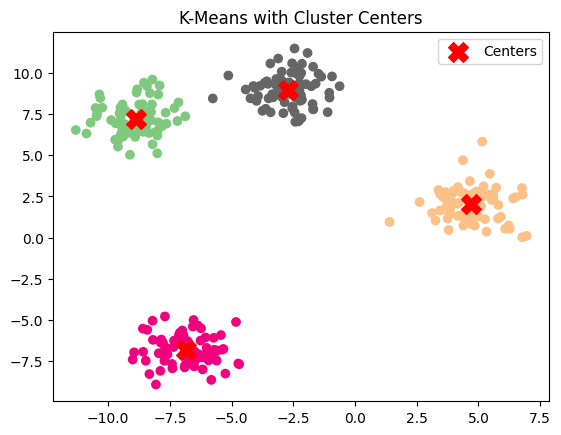

In [17]:
#Ans37
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
kmeans = KMeans(n_clusters=4).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='Accent')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centers')
plt.legend()
plt.title("K-Means with Cluster Centers")
plt.show()


In [18]:
#Ans38
X = iris.data
X = StandardScaler().fit_transform(X)
db = DBSCAN(eps=0.6).fit(X)

n_noise = list(db.labels_).count(-1)
print("Noise samples:", n_noise)


Noise samples: 26


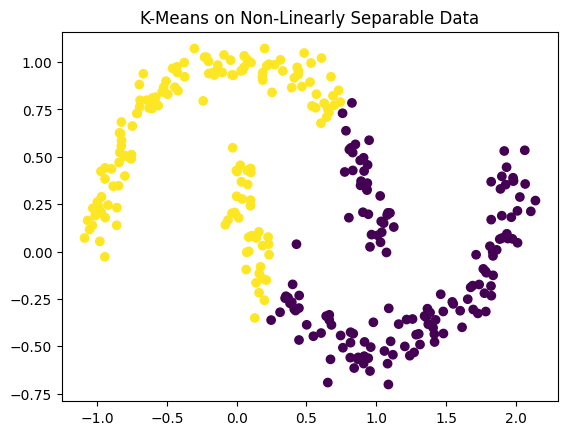

In [19]:
#Ans39
X, _ = make_moons(n_samples=300, noise=0.07)
kmeans = KMeans(n_clusters=2).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.title("K-Means on Non-Linearly Separable Data")
plt.show()


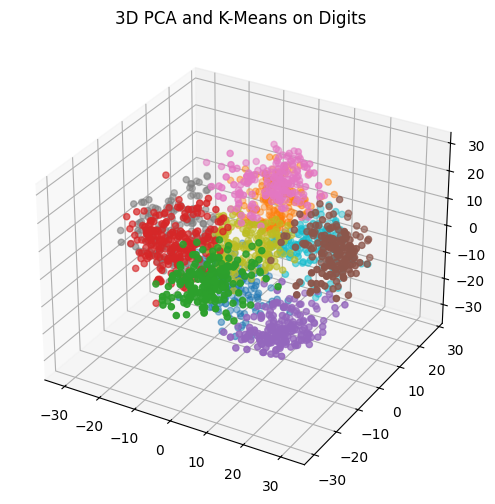

In [20]:
#Ans40
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
X_pca = pca.fit_transform(digits.data)

kmeans = KMeans(n_clusters=10, random_state=0).fit(X_pca)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=kmeans.labels_, cmap='tab10')
plt.title("3D PCA and K-Means on Digits")
plt.show()


In [21]:
#Ans41
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X, _ = make_blobs(n_samples=500, centers=5, random_state=42)
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
score = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", score)


Silhouette Score: 0.6786441315351273


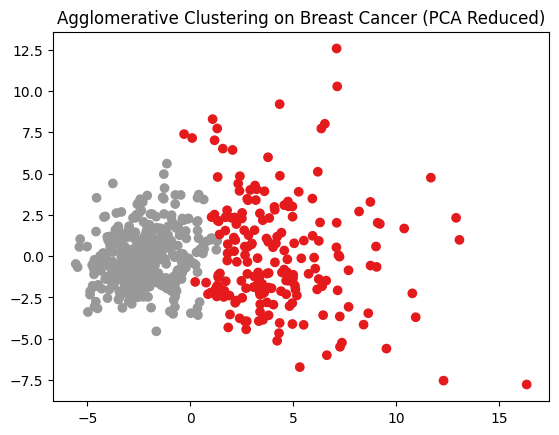

In [22]:
#Ans42
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

data = load_breast_cancer()
X_scaled = StandardScaler().fit_transform(data.data)
X_pca = PCA(n_components=2).fit_transform(X_scaled)

agg = AgglomerativeClustering(n_clusters=2).fit(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agg.labels_, cmap='Set1')
plt.title("Agglomerative Clustering on Breast Cancer (PCA Reduced)")
plt.show()


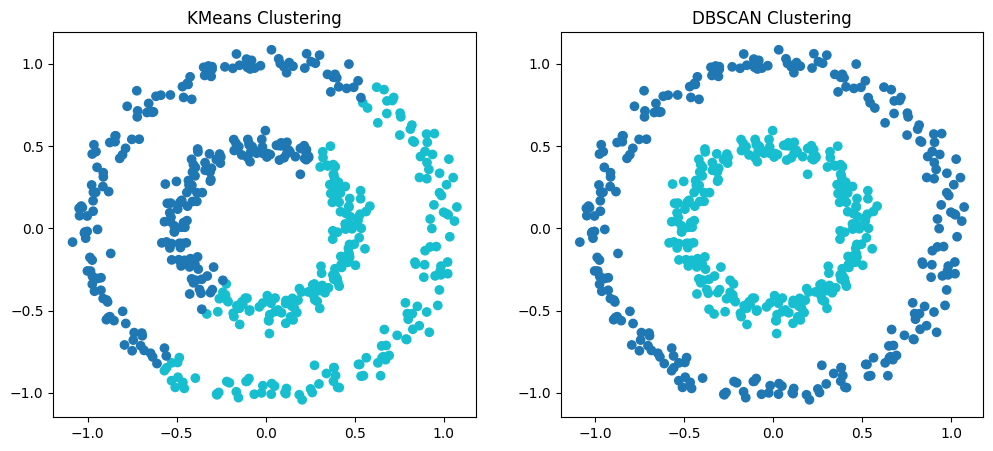

In [23]:
#Ans43
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

X, _ = make_circles(n_samples=500, noise=0.05, factor=0.5)

# KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

# DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5).fit(X)

# Plot side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='tab10')
ax1.set_title("KMeans Clustering")
ax2.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='tab10')
ax2.set_title("DBSCAN Clustering")
plt.show()


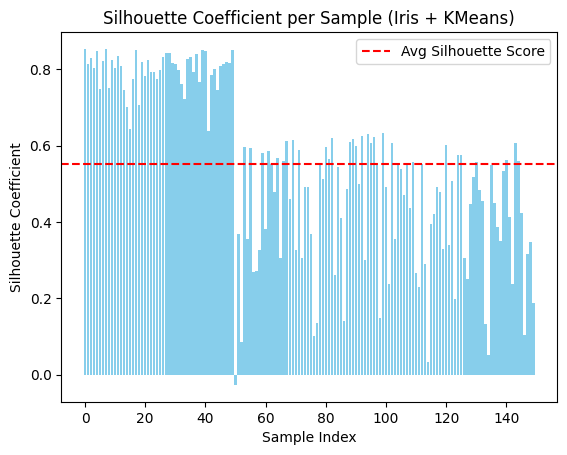

In [24]:
#Ans44
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

iris = load_iris()
X = iris.data
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
sil_vals = silhouette_samples(X, kmeans.labels_)

plt.bar(range(len(sil_vals)), sil_vals, color='skyblue')
plt.axhline(np.mean(sil_vals), color='red', linestyle='--', label='Avg Silhouette Score')
plt.title("Silhouette Coefficient per Sample (Iris + KMeans)")
plt.xlabel("Sample Index")
plt.ylabel("Silhouette Coefficient")
plt.legend()
plt.show()


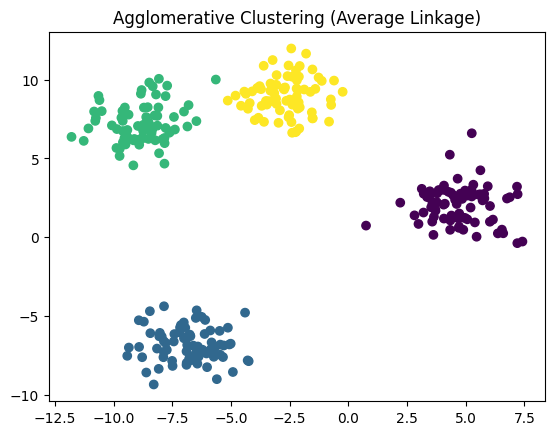

In [25]:
#Ans45
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.2, random_state=42)
agg = AgglomerativeClustering(n_clusters=4, linkage='average').fit(X)

plt.scatter(X[:, 0], X[:, 1], c=agg.labels_, cmap='viridis')
plt.title("Agglomerative Clustering (Average Linkage)")
plt.show()


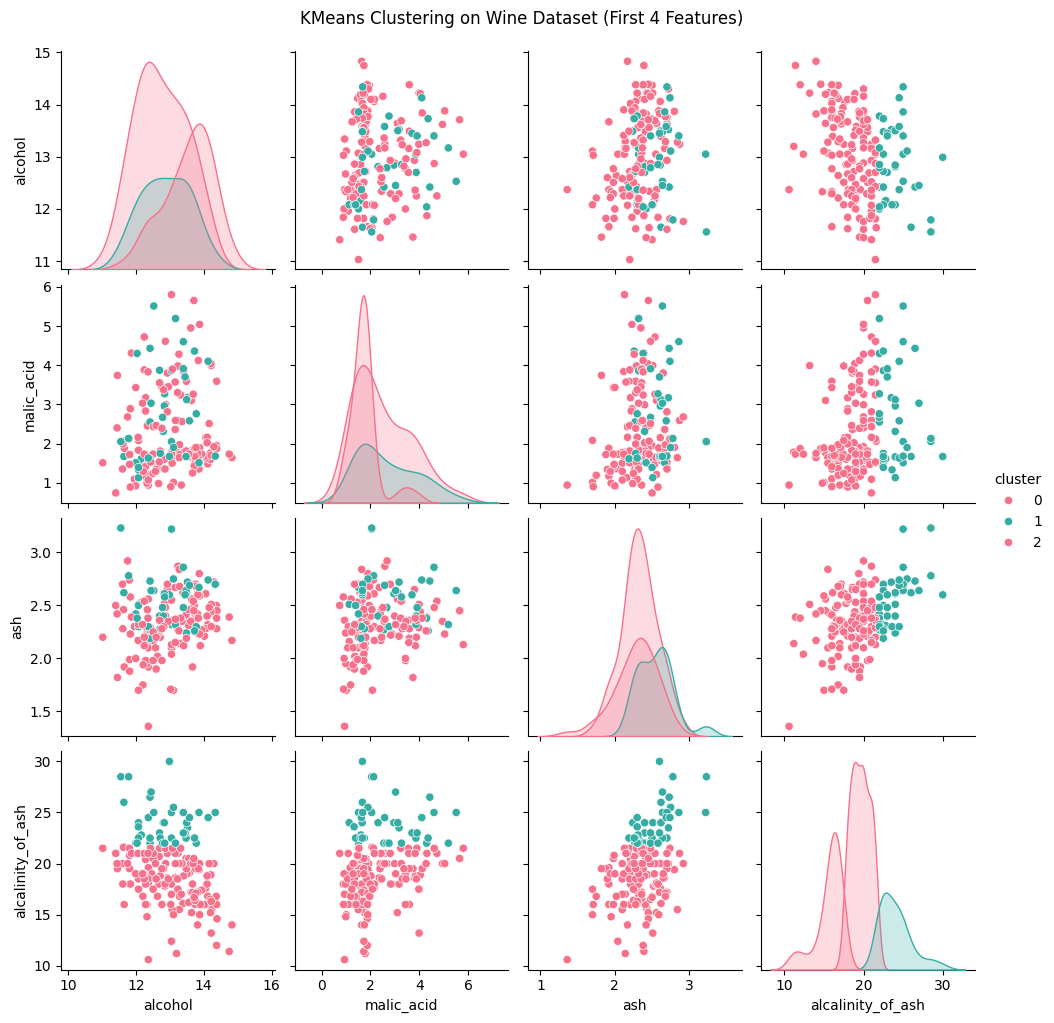

In [26]:
#Ans46
from sklearn.datasets import load_wine
import pandas as pd
import seaborn as sns

wine = load_wine()
df = pd.DataFrame(wine.data[:, :4], columns=wine.feature_names[:4])
kmeans = KMeans(n_clusters=3, random_state=0).fit(df)
df['cluster'] = kmeans.labels_

sns.pairplot(df, hue='cluster', palette='husl')
plt.suptitle("KMeans Clustering on Wine Dataset (First 4 Features)", y=1.02)
plt.show()


Number of clusters: 2
Number of noise points: 18


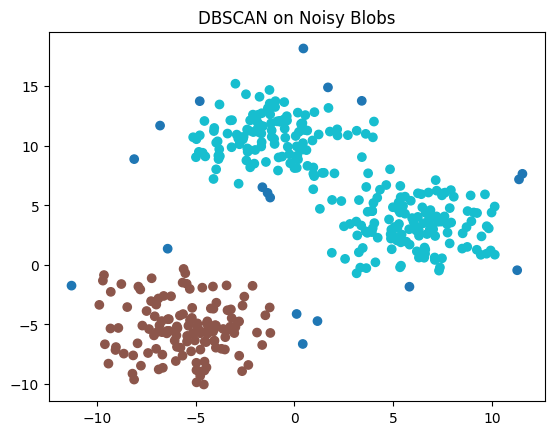

In [27]:
#Ans47
X, _ = make_blobs(n_samples=400, centers=3, cluster_std=2.0, random_state=42)
X += 3 * np.random.rand(*X.shape)  # add noise
dbscan = DBSCAN(eps=1.5, min_samples=5).fit(X)

labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Number of clusters:", n_clusters)
print("Number of noise points:", n_noise)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10')
plt.title("DBSCAN on Noisy Blobs")
plt.show()


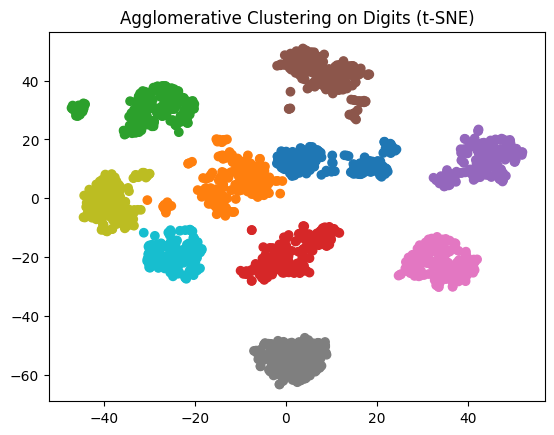

In [28]:
#Ans48
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

digits = load_digits()
X_tsne = TSNE(n_components=2, random_state=0).fit_transform(digits.data)

agg = AgglomerativeClustering(n_clusters=10).fit(X_tsne)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=agg.labels_, cmap='tab10')
plt.title("Agglomerative Clustering on Digits (t-SNE)")
plt.show()
